<h1 style="font-size: 48px; text-transform: Uppercase;"> Exploratory data analysis of HIV Data</h1>

<h1 style="font-size: 20px; text-transform: uppercase;">Analysis of Cases dataframe</h1>

In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd


In [38]:
cases = pd.read_csv("no_of_cases_adults_15_to_49_by_country_clean.csv")


In [39]:
cases.head(5)

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,0.1[0.1–0.1],0.1,0.1,0.1,Eastern Mediterranean
1,Albania,2018,na,NaN,NaN,NaN,Europe
2,Algeria,2018,0.1[0.1–0.1],0.1,0.1,0.1,Africa
3,Angola,2018,2.0[1.7–2.3],2.0,1.7,2.3,Africa
4,Argentina,2018,0.4[0.4–0.4],0.4,0.4,0.4,Americas


In [40]:
unique_years = cases['Year'].unique()
print("Unique values in the 'Year' column:", unique_years)


Unique values in the 'Year' column: [2018 2010 2005 2000]


In [42]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       680 non-null    object 
 1   Year          680 non-null    int64  
 2   Count         680 non-null    object 
 3   Count_median  556 non-null    float64
 4   Count_min     556 non-null    float64
 5   Count_max     556 non-null    float64
 6   WHO Region    680 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 37.3+ KB


In [43]:
cases['Count_median'].ffill(inplace=True)

In [44]:
nan_counts = cases.isna().sum()

print("NaN counts in each column:")
print(nan_counts)

NaN counts in each column:
Country           0
Year              0
Count             0
Count_median      0
Count_min       124
Count_max       124
WHO Region        0
dtype: int64


In [45]:
# Aggregate the data by country and sum up the counts
top_10_countries = cases.groupby('Country')['Count_median'].sum().nlargest(10)
print("Top 10 countries with the highest number of cases:")
print(top_10_countries)

Top 10 countries with the highest number of cases:
Country
Eswatini        105.6
Lesotho          94.7
Botswana         94.4
Zimbabwe         72.1
South Africa     68.7
Zambia           54.6
Namibia          53.0
Malawi           46.4
Mozambique       44.5
Uganda           28.1
Name: Count_median, dtype: float64


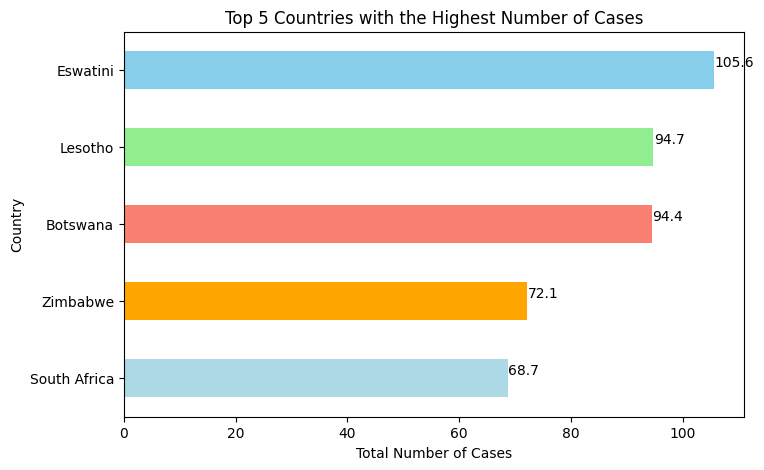

In [46]:
top_5_countries = cases.groupby('Country')['Count_median'].sum().nlargest(5)
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightblue']
plt.figure(figsize=(8, 5))
bars = top_5_countries.plot(kind='barh', color=colors)
plt.xlabel('Total Number of Cases')
plt.ylabel('Country')
plt.title('Top 5 Countries with the Highest Number of Cases')
plt.gca().invert_yaxis()  # Invert y-axis to have the country with the highest cases at the top
for bar, count in zip(bars.patches, top_5_countries.values):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2 - 0.1, f'{count:,}', va='center')
plt.savefig(r'C:\Users\pdlpr\Dropbox\Pratima\Projectt\top_5_countries_cases.png', dpi=100)
plt.show()


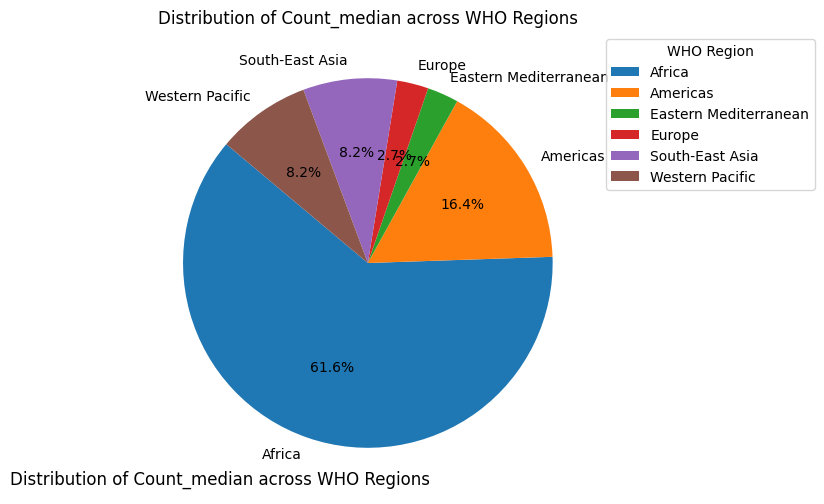

In [27]:
median_by_region = cases.groupby('WHO Region')['Count_median'].median()
# Plotting the pie chart
plt.figure(figsize=(12, 6))
pie = median_by_region.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Count_median across WHO Regions')
plt.ylabel('')
plt.text(-0.8, -1.2, 'Distribution of Count_median across WHO Regions', fontsize=12, ha='center')
plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1), title="WHO Region")
plt.savefig(r'C:\Users\pdlpr\Dropbox\Pratima\Projectt\distribution_Of_cases.png', dpi=100)
plt.show()

<Figure size 1200x600 with 0 Axes>

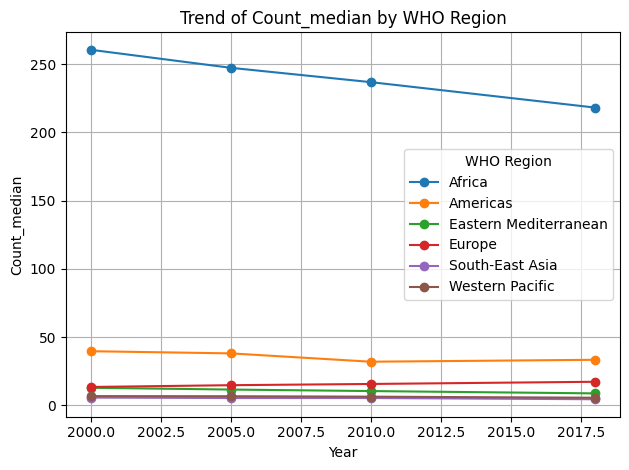

In [47]:
# Grouping data by 'WHO Region' and calculating the sum of 'Count_median'
region_counts = cases.groupby(['Year', 'WHO Region'])['Count_median'].sum().unstack()

# Create the line plot
plt.figure(figsize=(12, 6))
region_counts.plot(kind='line', marker='o', linestyle='-')
plt.title('Trend of Count_median by WHO Region')
plt.xlabel('Year')
plt.ylabel('Count_median')
plt.legend(title='WHO Region')
plt.grid(True)
plt.tight_layout()
plt.savefig(r'C:\Users\pdlpr\Dropbox\Pratima\Projectt\test.png', dpi=100)
plt.show()

<h1 style="font-size: 30px; text-transform: uppercase;">For Deaths Data</h1>

In [49]:
deaths = pd.read_csv("anaconda3/no_of_deaths_by_country_clean.csv")

In [50]:
cases.head(5)

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,0.1[0.1–0.1],0.1,0.1,0.1,Eastern Mediterranean
1,Albania,2018,na,0.1,NaN,NaN,Europe
2,Algeria,2018,0.1[0.1–0.1],0.1,0.1,0.1,Africa
3,Angola,2018,2.0[1.7–2.3],2.0,1.7,2.3,Africa
4,Argentina,2018,0.4[0.4–0.4],0.4,0.4,0.4,Americas


In [51]:
missing_values = deaths.isnull().sum()
print(missing_values)

Country           0
Year              0
Count             0
Count_median    110
Count_min       110
Count_max       110
WHO Region        0
dtype: int64


In [52]:
deaths.nlargest(10,"Count_median")

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
310,South Africa,2010,140000[110000–170000],140000.0,110000.0,170000.0,Africa
423,Kenya,2000,120000[88000–190000],120000.0,88000.0,190000.0,Africa
509,Zimbabwe,2000,120000[98000–150000],120000.0,98000.0,150000.0,Africa
480,South Africa,2000,100000[68000–140000],100000.0,68000.0,140000.0,Africa
497,Uganda,2000,85000[75000–99000],85000.0,75000.0,99000.0,Africa
501,United Republic of Tanzania,2000,80000[69000–90000],80000.0,69000.0,90000.0,Africa
454,Nigeria,2000,78000[45000–130000],78000.0,45000.0,130000.0,Africa
284,Nigeria,2010,72000[42000–120000],72000.0,42000.0,120000.0,Africa
140,South Africa,2018,71000[52000–91000],71000.0,52000.0,91000.0,Africa
276,Mozambique,2010,64000[46000–87000],64000.0,46000.0,87000.0,Africa


In [53]:
unique_regions = deaths['WHO Region'].unique()
print(unique_regions)

['Eastern Mediterranean' 'Europe' 'Africa' 'Americas' 'Western Pacific'
 'South-East Asia']


In [54]:
deaths['Count_median'].ffill(inplace=True)

<Figure size 1200x600 with 0 Axes>

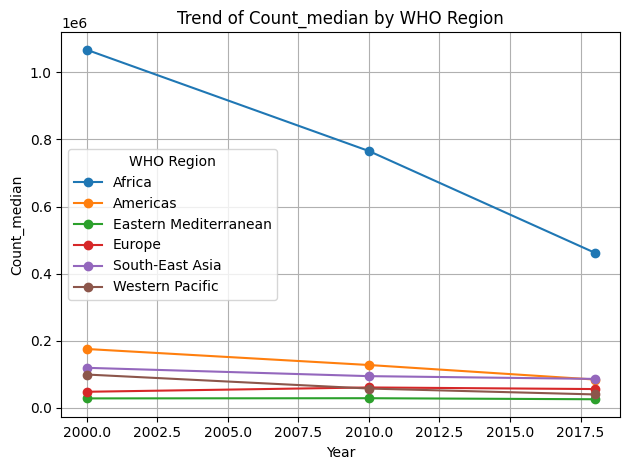

In [55]:
# Grouping data by 'WHO Region' and calculating the sum of 'Count_median'
region_counts = deaths.groupby(['Year', 'WHO Region'])['Count_median'].sum().unstack()

# Create the line plot
plt.figure(figsize=(12, 6))
region_counts.plot(kind='line', marker='o', linestyle='-')
plt.title('Trend of Count_median by WHO Region')
plt.xlabel('Year')
plt.ylabel('Count_median')
plt.legend(title='WHO Region')
plt.grid(True)
plt.tight_layout()
plt.savefig(r'C:\Users\pdlpr\Dropbox\Pratima\Projectt\testII.png', dpi=100)
plt.show()

C:\Users\pdlpr\AppData\Local\Temp\ipykernel_20572\3486656173.py:9: UserWarning: 
The palette list has fewer values (5) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=highest_deaths, x="Year", y="Count_median", hue="Country", marker='o', linewidth=2.5, palette=custom_palette)


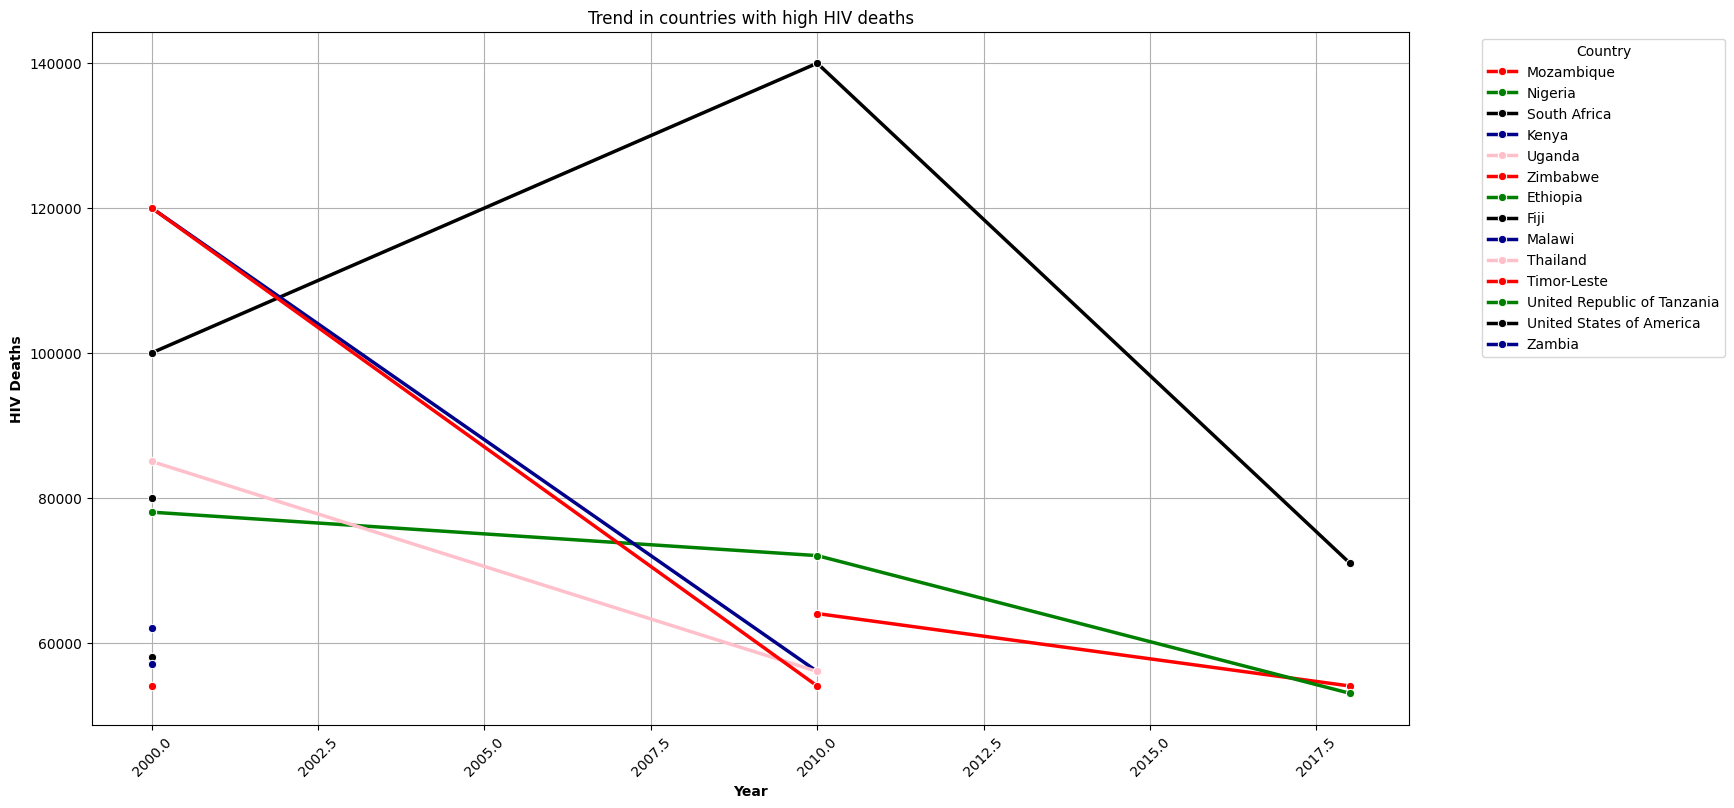

In [59]:
# Filter countries with high HIV deaths
highest_deaths = deaths[deaths["Count_median"] >= 50000]

# Define a custom palette with the specified colors
custom_palette = ["red", "green", "black", "darkblue", "pink"]

# Plotting the line plot with custom colors and thicker lines
plt.figure(figsize=(17, 9))
sns.lineplot(data=highest_deaths, x="Year", y="Count_median", hue="Country", marker='o', linewidth=2.5, palette=custom_palette)
plt.title("Trend in countries with high HIV deaths")
plt.xlabel("Year", fontweight='bold')  # Setting x label in bold
plt.ylabel("HIV Deaths", fontweight='bold')  # Setting y label in bold
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(r'C:\Users\pdlpr\Dropbox\Pratima\Projectt\testII.png', dpi=100)
plt.show()

In [ ]:
# Convert the 'Count' column to float directly
deaths['Count_median'] = deaths['Count_median'].astype(float)

# Group the data by WHO Region and Year, and calculate the sum of 'Count'
grouped_deaths = deaths.groupby(['WHO Region', 'Year'])['Count_median)'].sum().reset_index()

# Pivot the data
pivot_deaths = grouped_deaths.pivot(index='WHO Region', columns='Year', values='Count')

# Plotting the heatmap with dark bold numbers
plt.figure(figsize=(7, 5))
sns.heatmap(pivot_deaths, cmap='RdPu', annot=True, fmt=".0f", linewidths=0.5,
            annot_kws={'fontweight': 'bold', 'fontsize': 10})
plt.title('Heatmap showing total deaths by WHO region and year')
plt.xlabel('Year')
plt.ylabel('WHO Region')
plt.xticks(rotation=45)
plt.show()

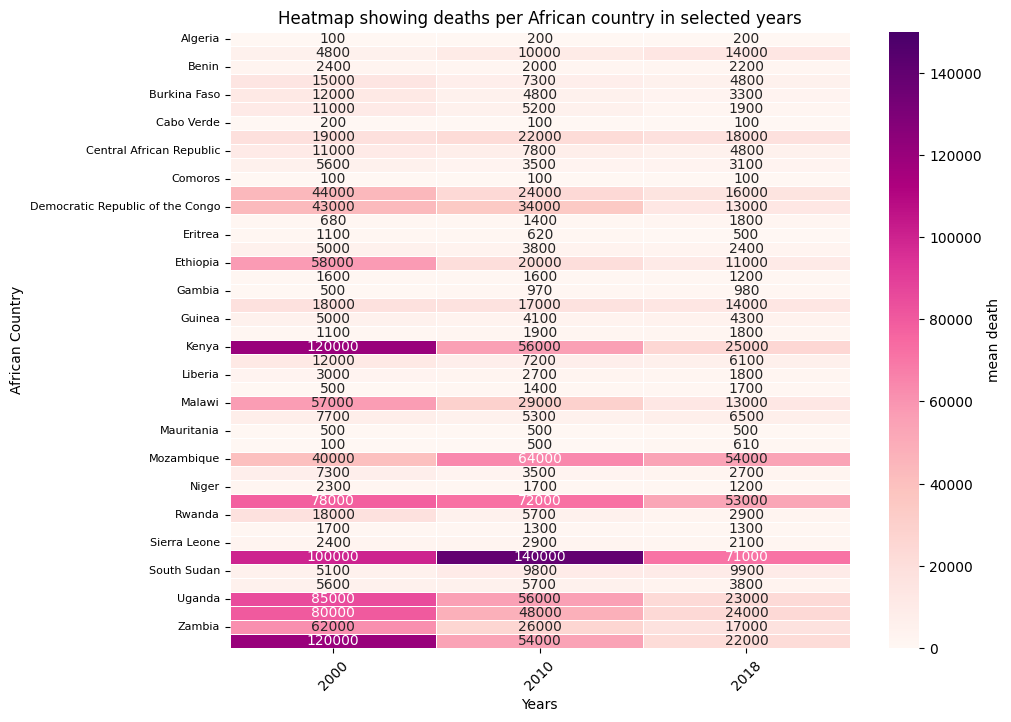

In [74]:
# Filter data for WHO Region 'Africa'
african_deaths = deaths[deaths['WHO Region'] == 'Africa']

# Group by region and year, calculate the mean of Count_median
grouped_deaths = african_deaths.groupby(['Country', 'Year'])['Count_median'].mean().reset_index()

# Pivot the data for plotting
pivot_deaths = grouped_deaths.pivot(index='Country', columns='Year', values='Count_median')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_deaths, cmap='RdPu', annot=True, fmt=".0f", linewidths=0.5,
            cbar_kws={'label': 'mean death', 'orientation': 'vertical'},
            vmin=0, vmax=150000)
plt.title('Heatmap showing deaths per African country in selected years')
plt.xlabel('Years')
plt.ylabel('African Country')
plt.xticks(rotation=45)
plt.yticks(size=8)
plt.savefig(r'C:\Users\pdlpr\Dropbox\Pratima\Projectt\testII.png', dpi=100)
plt.show()

C:\Users\pdlpr\AppData\Local\Temp\ipykernel_11344\975327000.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


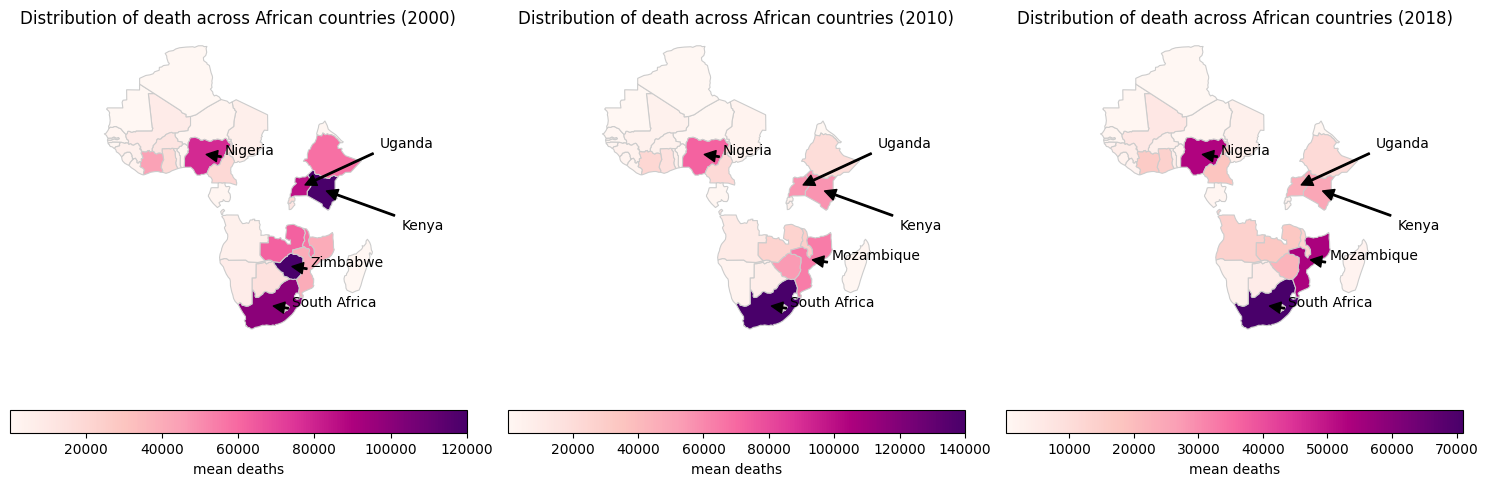

In [57]:
def annotate_countries(ax, data):
    top_5_countries = data.sort_values(by='Count_median', ascending=False).head(5)
    for idx, row in top_5_countries.iterrows():
        xytext = (row.geometry.centroid.x + 5, row.geometry.centroid.y)
        if row['Country'] == 'Uganda':
            xytext = (row.geometry.centroid.x + 20, row.geometry.centroid.y + 10)
        elif row['Country'] == 'Kenya':
            xytext = (row.geometry.centroid.x + 20, row.geometry.centroid.y - 10)
        ax.annotate(row['Country'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     xytext=xytext,
                     arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8, headlength=8))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
years = [2000, 2010, 2018]

fig, axes = plt.subplots(1, len(years), figsize=(15, 5))

for i, year in enumerate(years):
    map_death = world.merge(deaths[(deaths['WHO Region'] == 'Africa') & (deaths['Year'] == year)], left_on='name', right_on='Country', how='left')
    map_africa = map_death.dropna(subset=['Count_median'])
    map_africa.plot(column='Count_median', cmap='RdPu', linewidth=0.8, edgecolor='0.8', legend=True, ax=axes[i],
                    legend_kwds={'label': "mean deaths", 'orientation': "horizontal"})
    annotate_countries(axes[i], map_africa)
    axes[i].set_title(f'Distribution of death across African countries ({year})')
    axes[i].set_axis_off()

plt.tight_layout()
plt.savefig(r'C:\Users\pdlpr\Dropbox\Pratima\Projectt\testII.png', dpi=100)
plt.show()

<h1 style="font-size: 30px; text-transform: uppercase;">For Prevention Data</h1>

In [62]:
prevention = pd.read_csv("anaconda3/prevention_of_mother_to_child_transmission_by_country_clean.csv")

In [63]:
prevention.head()

,Country,Received Antiretrovirals,Needing antiretrovirals,Percentage Recieved,Needing antiretrovirals_median,Needing antiretrovirals_min,Needing antiretrovirals_max,Percentage Recieved_median,Percentage Recieved_min,Percentage Recieved_max,WHO Region
0,Afghanistan,20,200[100–500],11[7–18],200.0,100.0,500.0,11.0,7.0,18.0,Eastern Mediterranean
1,Albania,No data,Nodata,Nodata,NaN,NaN,NaN,NaN,NaN,NaN,Europe
2,Algeria,320,500[500–500],74[69–78],500.0,500.0,500.0,74.0,69.0,78.0,Africa
3,Angola,9600,25000[19000–32000],38[29–48],25000.0,19000.0,32000.0,38.0,29.0,48.0,Africa
4,Argentina,1800,1800[1600–2000],95[85–95],1800.0,1600.0,2000.0,95.0,85.0,95.0,Americas


In [65]:
columns_names = prevention.columns
print(columns_names)

Index(['Country', 'Received Antiretrovirals', 'Needing antiretrovirals',
       'Percentage Recieved', 'Needing antiretrovirals_median',
       'Needing antiretrovirals_min', 'Needing antiretrovirals_max',
       'Percentage Recieved_median', 'Percentage Recieved_min',
       'Percentage Recieved_max', 'WHO Region'],
      dtype='object')


In [67]:
prevention["Received Antiretrovirals"]= pd.to_numeric(prevention["Received Antiretrovirals"],errors='coerce')
prevention["Received Antiretrovirals"] = prevention["Received Antiretrovirals"].astype(float)
preventionbyregion = prevention.groupby("WHO Region").sum()

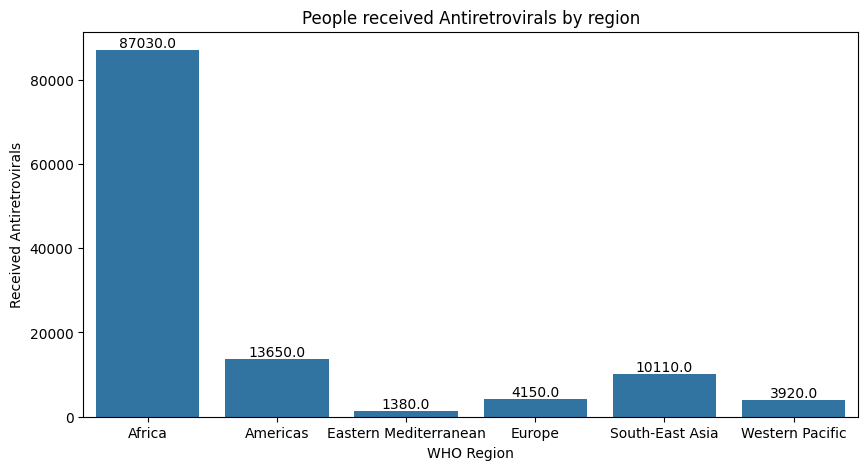

In [69]:
fig = plt.figure(figsize=(10, 5))
sns.barplot(x=preventionbyregion.index, y=preventionbyregion["Received Antiretrovirals"])
for index, value in enumerate(preventionbyregion["Received Antiretrovirals"]):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.title("People received Antiretrovirals by region")
plt.savefig(r'C:\Users\pdlpr\Dropbox\Pratima\Projectt\testII.png', dpi=100)
plt.savefig(r'C:\Users\pdlpr\Dropbox\Pratima\Projectt\testII.png', dpi=100)
plt.show()

In [71]:
import re
def extract_numbers(s):
    s = str(s)
    numbers = re.findall(r'\d+', s)
    if numbers:
        return int(numbers[0])
    else:
        return None
prevention['Needing antiretrovirals'] = prevention['Needing antiretrovirals'].apply(extract_numbers)

In [72]:
prevention.head()

,Country,Received Antiretrovirals,Needing antiretrovirals,Percentage Recieved,Needing antiretrovirals_median,Needing antiretrovirals_min,Needing antiretrovirals_max,Percentage Recieved_median,Percentage Recieved_min,Percentage Recieved_max,WHO Region
0,Afghanistan,20.0,200.0,11[7–18],200.0,100.0,500.0,11.0,7.0,18.0,Eastern Mediterranean
1,Albania,NaN,NaN,Nodata,NaN,NaN,NaN,NaN,NaN,NaN,Europe
2,Algeria,320.0,500.0,74[69–78],500.0,500.0,500.0,74.0,69.0,78.0,Africa
3,Angola,9600.0,25000.0,38[29–48],25000.0,19000.0,32000.0,38.0,29.0,48.0,Africa
4,Argentina,1800.0,1800.0,95[85–95],1800.0,1600.0,2000.0,95.0,85.0,95.0,Americas


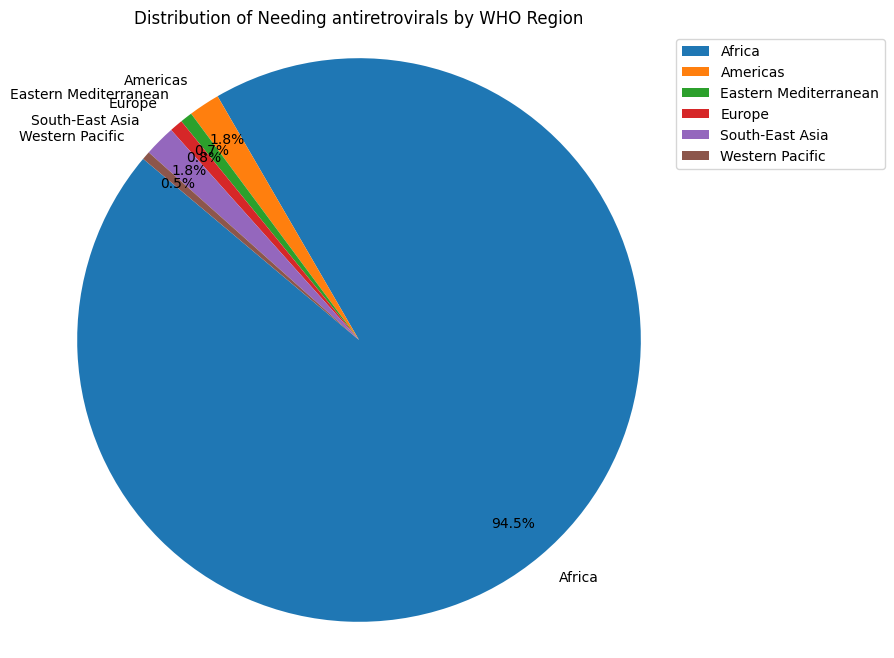

In [73]:
# Grouping data by 'WHO Region' and calculating the sum of 'Needing antiretrovirals'
region_counts = prevention.groupby('WHO Region')['Needing antiretrovirals'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Distribution of Needing antiretrovirals by WHO Region')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal') 
plt.savefig(r'C:\Users\pdlpr\Dropbox\Pratima\Projectt\prevention.png', dpi=100)
plt.show()

In [62]:
prevention.nlargest(10, ["Received Antiretrovirals"])


,Country,Received Antiretrovirals,Needing antiretrovirals,Percentage Recieved,Needing antiretrovirals_median,Needing antiretrovirals_min,Needing antiretrovirals_max,Percentage Recieved_median,Percentage Recieved_min,Percentage Recieved_max,WHO Region
3,Angola,9600.0,25000.0,38[29–48],25000.0,19000.0,32000.0,38.0,29.0,48.0,Africa
54,Eswatini,8600.0,11000.0,79[66–89],11000.0,9000.0,12000.0,79.0,66.0,89.0,Africa
131,Rwanda,8600.0,8100.0,95[79–95],8100.0,6000.0,9400.0,95.0,79.0,95.0,Africa
89,Lesotho,8200.0,11000.0,77[59–89],11000.0,8200.0,12000.0,77.0,59.0,89.0,Africa
31,Chad,5600.0,10000.0,56[40–72],10000.0,7200.0,13000.0,56.0,40.0,72.0,Africa
141,South Sudan,5500.0,9900.0,56[41–74],9900.0,7200.0,13000.0,56.0,41.0,74.0,Africa
69,Haiti,4900.0,5900.0,83[67–95],5900.0,4700.0,6800.0,83.0,67.0,95.0,Americas
24,Burkina Faso,4700.0,4900.0,95[71–95],4900.0,3600.0,6100.0,95.0,71.0,95.0,Africa
16,Benin,4600.0,2600.0,95[95–95],2600.0,1600.0,4300.0,95.0,95.0,95.0,Africa
135,Sierra Leone,4400.0,NaN,Nodata,NaN,NaN,NaN,NaN,NaN,NaN,Africa


<h1 style="font-size: 30px; text-transform: uppercase;">For living Data</h1>

In [74]:
living = pd.read_csv("anaconda3/no_of_people_living_with_hiv_by_country_clean.csv")

In [75]:
living.head(5)

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,7200[4100–11000],7200.0,4100.0,11000.0,Eastern Mediterranean
1,Albania,2018,na,NaN,NaN,NaN,Europe
2,Algeria,2018,16000[15000–17000],16000.0,15000.0,17000.0,Africa
3,Angola,2018,330000[290000–390000],330000.0,290000.0,390000.0,Africa
4,Argentina,2018,140000[130000–150000],140000.0,130000.0,150000.0,Americas


In [76]:
l2000 = living[living["Year"]==2000][["Country","Count_median"]].set_index("Country")
l2005 = living[living["Year"]==2005][["Country","Count_median","WHO Region"]].set_index("Country")
l2010 = living[living["Year"]==2010][["Country","Count_median"]].set_index("Country")
l2018 = living[living["Year"]==2018][["Country","Count_median"]].set_index("Country")

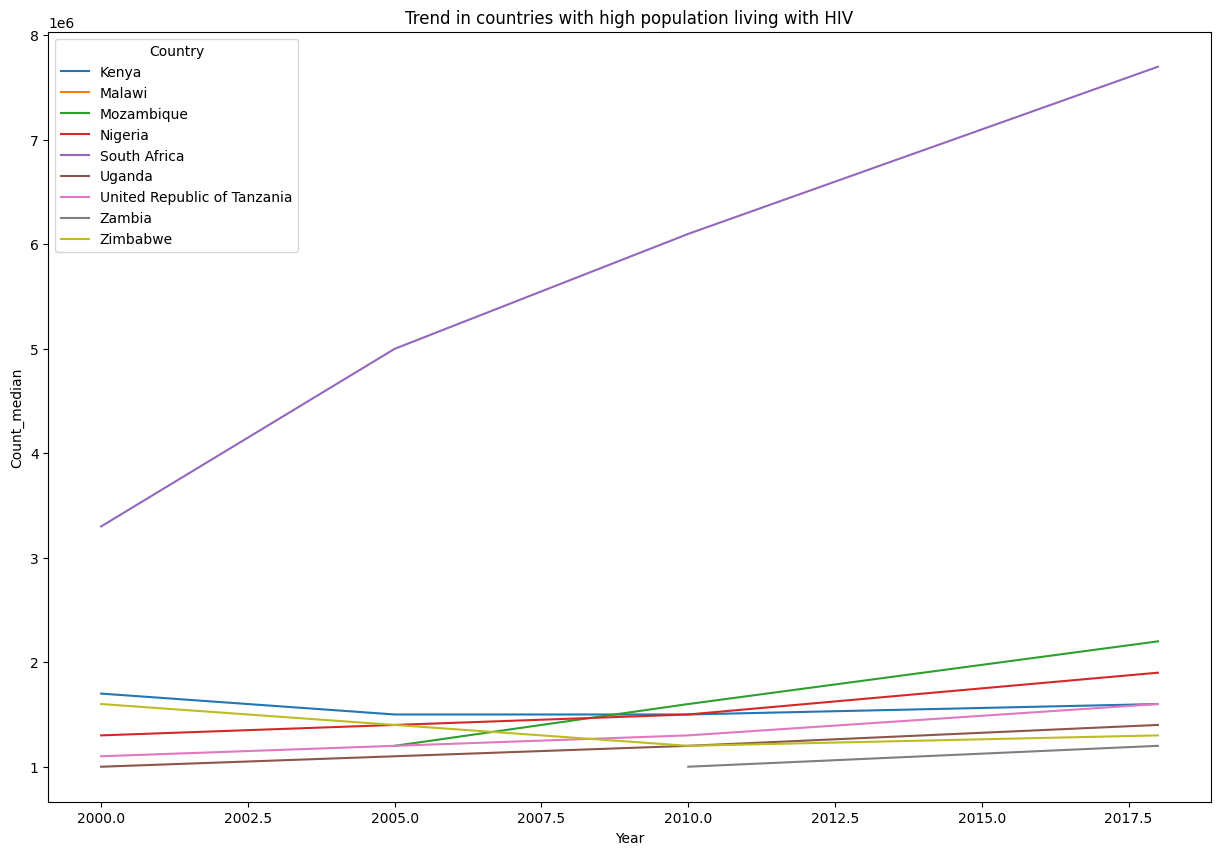

In [78]:
highestliving =living[living["Count_median"]>=1000000]
fig=plt.figure(figsize=(15,10))
sns.lineplot(data=highestliving,x="Year",y="Count_median",hue="Country").set_title("Trend in countries with high population living with HIV");

plt.savefig(r'C:\Users\pdlpr\Dropbox\Pratima\Projectt\livingtrend.png', dpi=100)
plt.show()

In [81]:
highestliving

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
83,Kenya,2018,1600000[1300000–1900000],1600000.0,1300000.0,1900000.0,Africa
95,Malawi,2018,1000000[940000–1100000],1000000.0,940000.0,1100000.0,Africa
106,Mozambique,2018,2200000[1700000–2700000],2200000.0,1700000.0,2700000.0,Africa
114,Nigeria,2018,1900000[1400000–2600000],1900000.0,1400000.0,2600000.0,Africa
140,South Africa,2018,7700000[7100000–8300000],7700000.0,7100000.0,8300000.0,Africa
157,Uganda,2018,1400000[1300000–1500000],1400000.0,1300000.0,1500000.0,Africa
161,United Republic of Tanzania,2018,1600000[1400000–1700000],1600000.0,1400000.0,1700000.0,Africa
168,Zambia,2018,1200000[1100000–1400000],1200000.0,1100000.0,1400000.0,Africa
169,Zimbabwe,2018,1300000[1100000–1500000],1300000.0,1100000.0,1500000.0,Africa
253,Kenya,2010,1500000[1200000–1800000],1500000.0,1200000.0,1800000.0,Africa


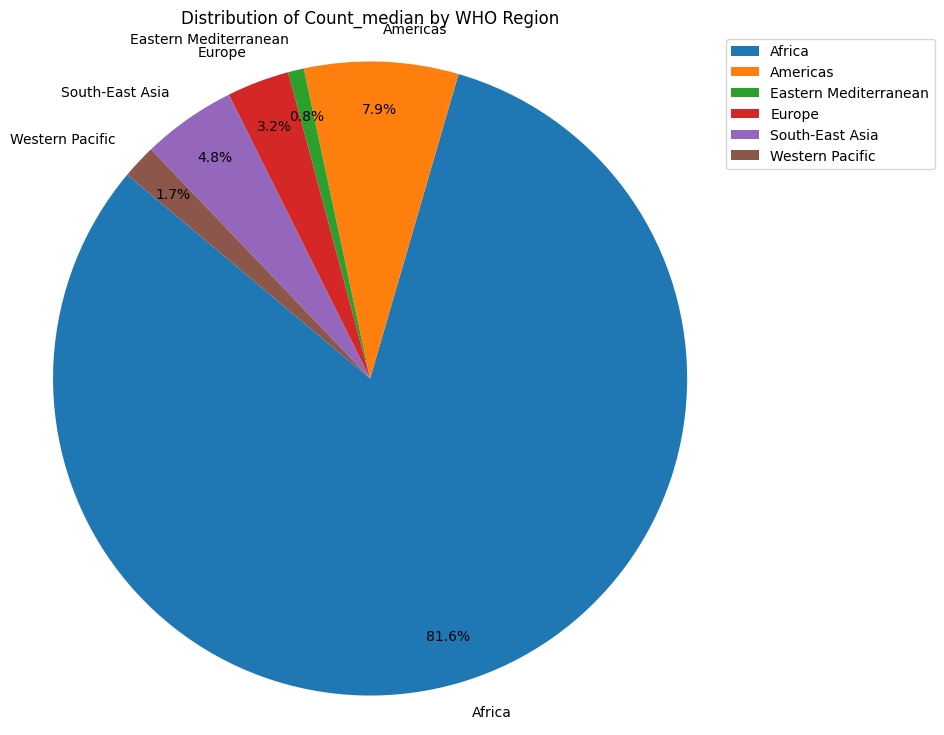

In [81]:
# Grouping data by 'WHO Region' and calculating the sum of 'Count_median'
region_counts = living.groupby('WHO Region')['Count_median'].sum()

# Plotting the pie chart
plt.figure(figsize=(9, 9))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Distribution of Count_median by WHO Region')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal') 
plt.savefig(r'C:\Users\pdlpr\Dropbox\Pratima\Projectt\livingtrend_for_all_WHO_region.png', dpi=100)
plt.show()

In [80]:
# Filter the Living DataFrame for the Americas WHO region
americas_living = living[living['WHO Region'] == 'Americas']

# Sort the data by Count_median in descending order
highest_living_americas = americas_living.sort_values(by='Count_median', ascending=False)

# Display the top countries with highest living cases in the Americas
print("Top countries with highest living cases in the Americas WHO region:")
print(highest_living_americas[['Country', 'Count_median']].head())

Top countries with highest living cases in the Americas WHO region:
                      Country  Count_median
332  United States of America      990000.0
21                     Brazil      900000.0
191                    Brazil      670000.0
361                    Brazil      550000.0
531                    Brazil      410000.0


In [88]:
# Filter the Living DataFrame for the Americas WHO region
americas_living = living[living['WHO Region'] == 'Americas']

# Group by country and calculate the sum of Count_median across all years
top_countries_americas = americas_living.groupby('Country')['Count_median'].sum().reset_index()

# Sort the data by Count_median in descending order
top_countries_americas = top_countries_americas.sort_values(by='Count_median', ascending=False)

# Display the top 10 countries with highest living cases in the Americas
print("Top 10 countries with highest living cases in the Americas WHO region:")
print(top_countries_americas.head(10))

Top 10 countries with highest living cases in the Americas WHO region:
                     Country  Count_median
5                     Brazil     2530000.0
27  United States of America      990000.0
20                    Mexico      690000.0
17                     Haiti      590000.0
8                   Colombia      520000.0
0                  Argentina      399000.0
9                      Congo      328000.0
12        Dominican Republic      306000.0
24                      Peru      280000.0
15                 Guatemala      188000.0


In [ ]:
# Filter the cases data for the top 10 countries
top_10_countries_cases = cases[cases['Country'].isin(top_10_countries.index)]

# Pivot the data
pivot_table = top_10_countries_cases.pivot_table(index='Country', columns='Year', values='Count_median', aggfunc='sum')

# Create the heatmap with numbers inside cells
plt.figure(figsize=(6, 5))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".0f", linewidths=0.5,
            annot_kws={'fontweight': 'bold', 'fontsize': 10})
plt.title('Heatmap of Count_median for Top 10 Countries by Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig(r'C:\Users\pdlpr\Dropbox\Pratima\Projectt\testII.png', dpi=100)
plt.show()